# 1. Obtener la correlación entre los atributos y los atributos con el target. ¿Cuál atributo tiene mayor correlación lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o directamente graficar usando un mapa de calor.

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

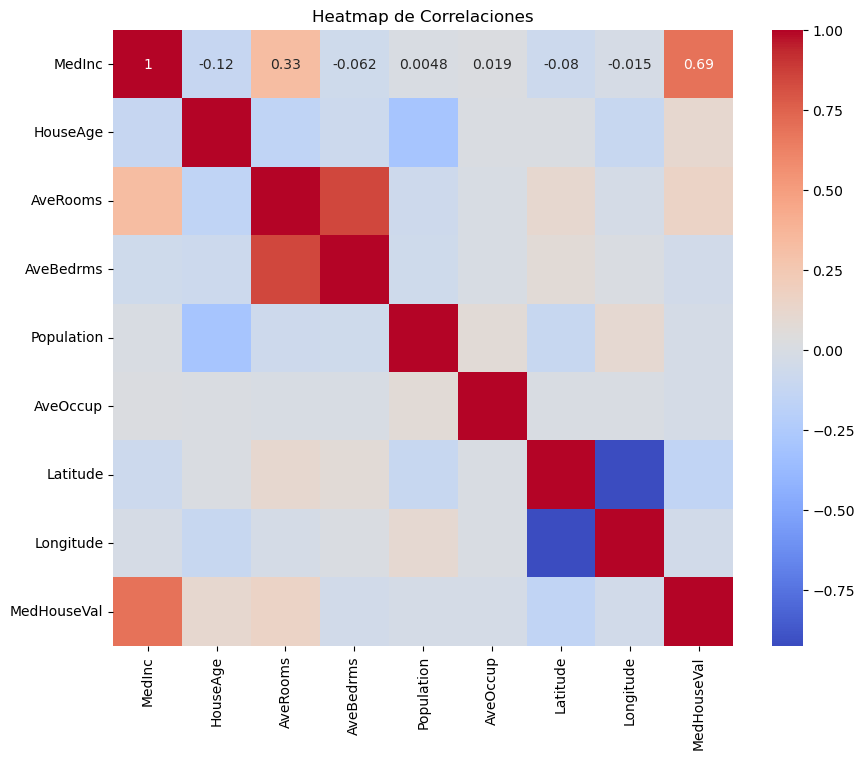

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Cargar el dataset de California Housing
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Revisar la estructura del dataset
print(df.head())
print(df.info())

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

# 2. Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma de histograma se observa? ¿Se observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin entrar en pruebas de hipótesis?

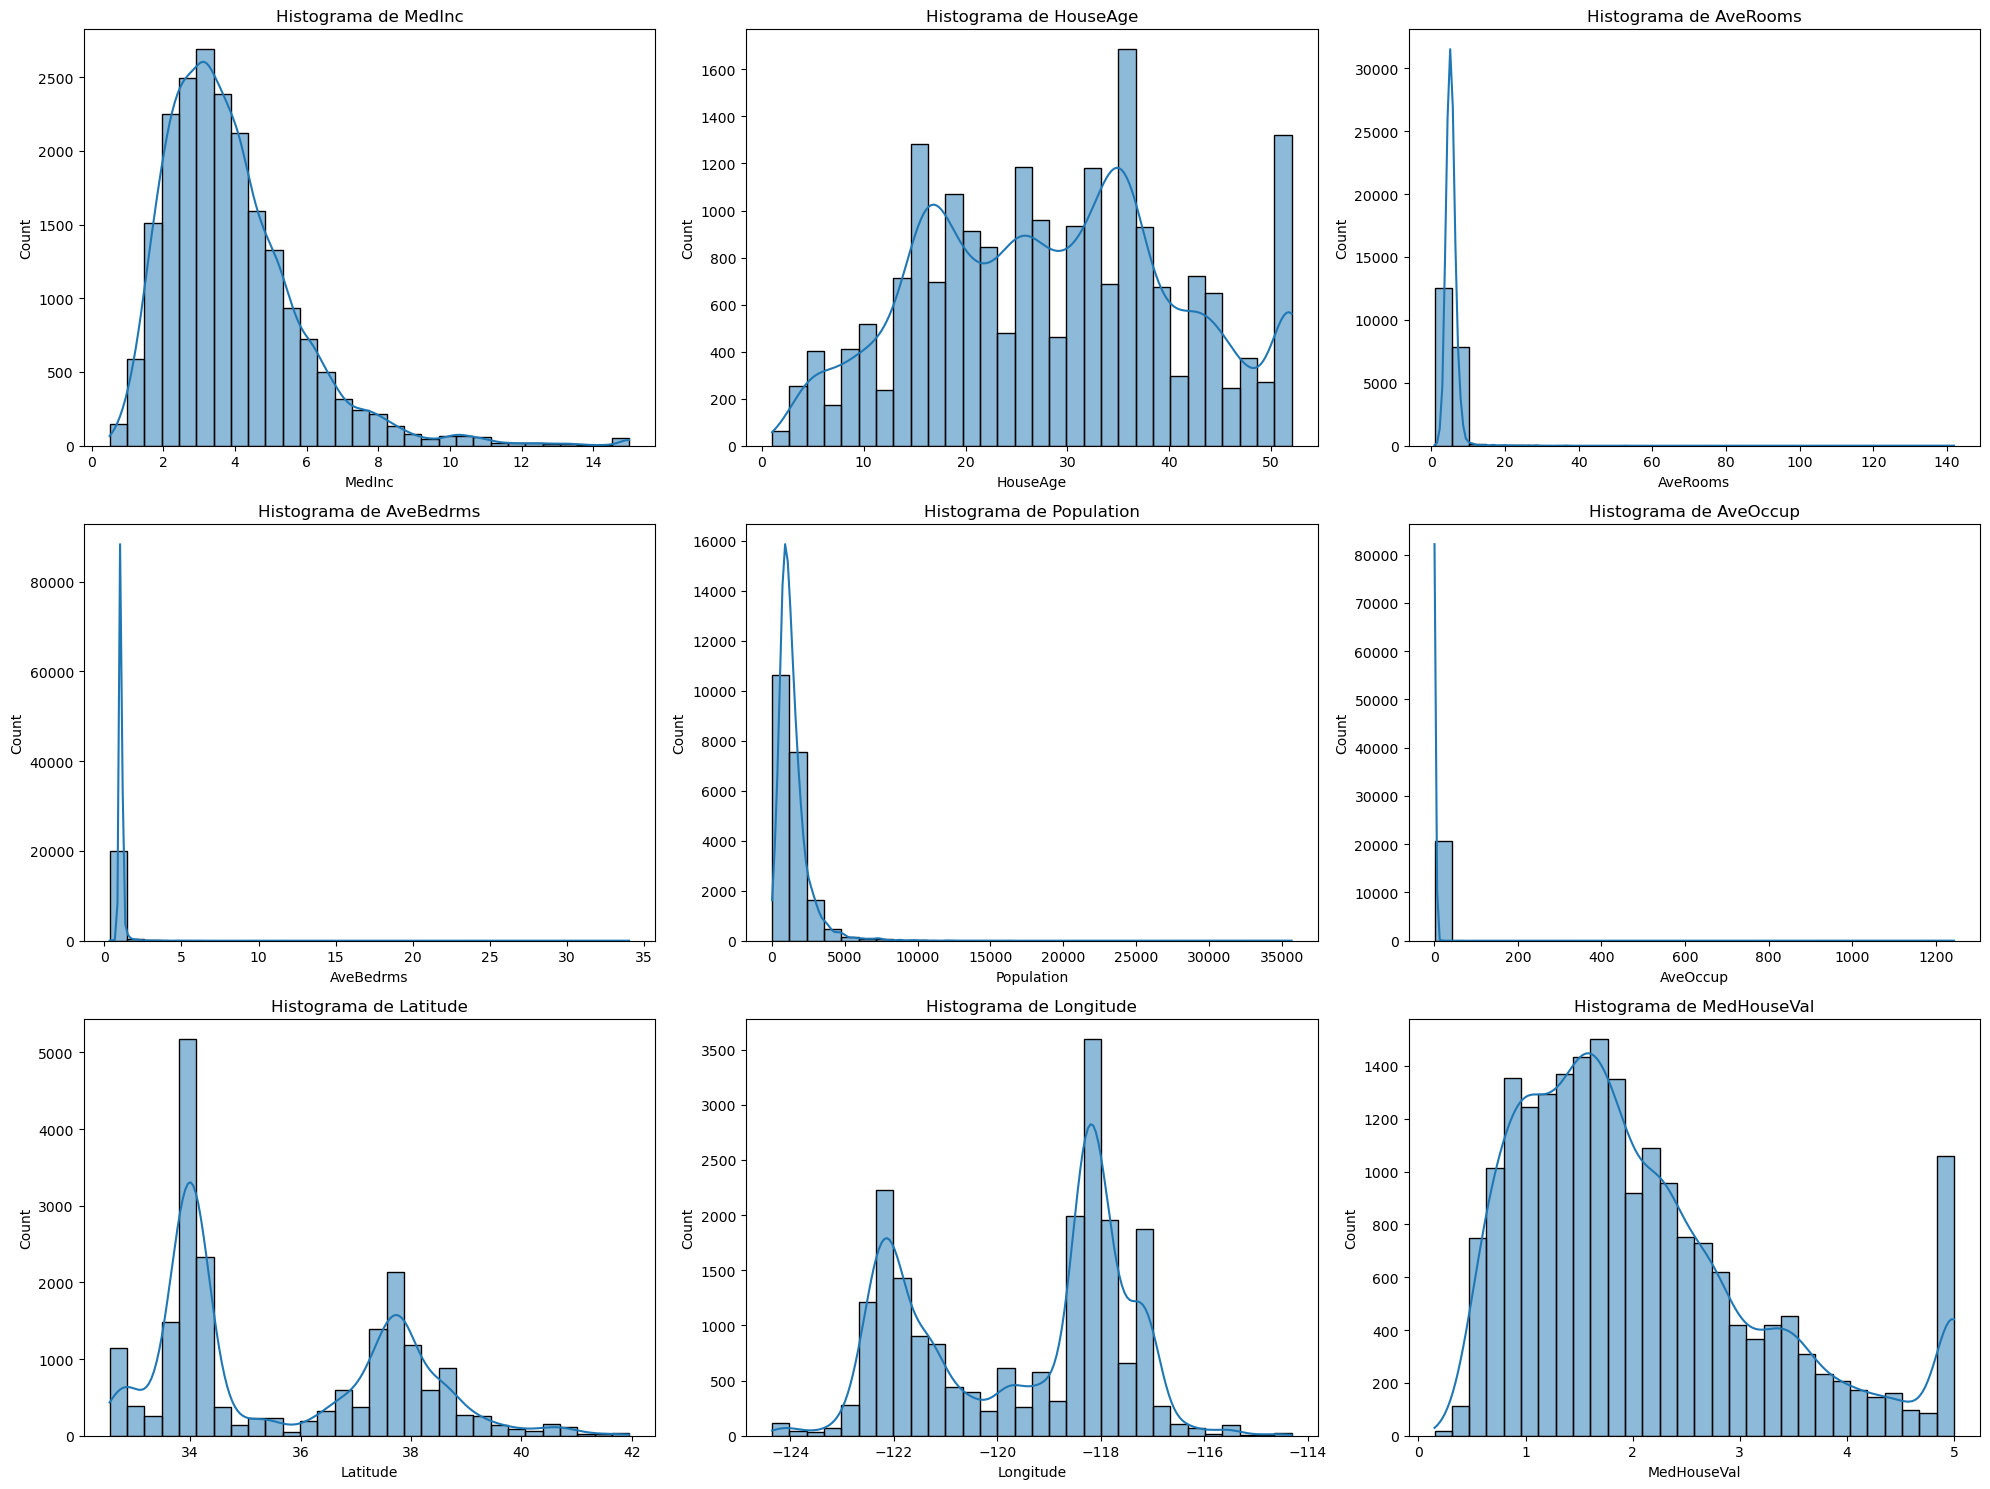

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import warnings

# Suprimir los FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Cargar el dataset de California Housing
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Lista de columnas
columns = df.columns

# Configurar el tamaño del gráfico
plt.figure(figsize=(20, 15))

# Crear histogramas para cada atributo
for i, column in enumerate(columns):
    plt.subplot(3, 3, i+1)  # Crear una subtrama para cada histograma
    sns.histplot(df[column], kde=True, bins=30)  # Graficar el histograma con una curva de densidad (kde)
    plt.title(f'Histograma de {column}')

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()



# 3. Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del modelo y la que es explicada con el modelo. ¿El modelo está capturando el comportamiento del target? Expanda su respuesta.

In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings

# Suprimir los FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Cargar el dataset de California Housing
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Separar las características (X) y el target (y)
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

# Calcular la varianza total del target en el conjunto de entrenamiento
total_variance = y_train.var()

# Calcular la varianza explicada por el modelo
explained_variance = r2_score(y_train, y_train_pred) * total_variance

# Mostrar los resultados
print(f"Varianza Total del Target en el Conjunto de Entrenamiento: {total_variance}")
print(f"Varianza Explicada por el Modelo en el Conjunto de Entrenamiento: {explained_variance}")
print(f"Proporción de Varianza Explicada (R^2): {r2_score(y_train, y_train_pred)}")


Varianza Total del Target en el Conjunto de Entrenamiento: 1.3368591746754857
Varianza Explicada por el Modelo en el Conjunto de Entrenamiento: 0.8188946801770715
Proporción de Varianza Explicada (R^2): 0.6125511913966952


### Evaluación del Modelo de Regresión Lineal

#### Datos

- **Varianza Total del Target en el Conjunto de Entrenamiento**: 1.3369
- **Varianza Explicada por el Modelo en el Conjunto de Entrenamiento**: 0.8189
- **Proporción de Varianza Explicada (R^2)**: 0.6126

#### Interpretación de la Varianza Explicada (R^2)

- **R^2 = 0.6126**: Este valor indica que aproximadamente el 61.26% de la variabilidad en el valor medio de las casas (`MedHouseVal`) puede ser explicada por el modelo de regresión lineal utilizando los atributos disponibles en el dataset.

#### Evaluación del Modelo

1. **Moderada Varianza Explicada**:
   - Un R^2 de 0.6126 sugiere que el modelo tiene un desempeño moderado en capturar la relación entre los atributos y el target. No es un ajuste excelente, pero aún así es razonable y muestra que los atributos disponibles explican una parte significativa de la variabilidad en el valor de las casas.

2. **Comparación con Umbrales Comunes**:
   - **R^2 ≥ 0.7**: Se considera que el modelo tiene un buen ajuste.
   - **0.5 ≤ R^2 < 0.7**: Se considera un ajuste moderado. En este caso, tu modelo cae en esta categoría.
   - **R^2 < 0.5**: Se considera que el modelo no captura bien la variabilidad del target.

#### Conclusión

Dado que el R^2 es 0.6126, podemos concluir que:

- **El modelo tiene un ajuste moderado**: Está capturando una cantidad significativa de la variabilidad en el valor medio de las casas, pero hay un 38.74% de la variabilidad que no está siendo explicada por el modelo.
- **El modelo captura parcialmente el comportamiento del target**: Aunque el modelo explica más de la mitad de la variabilidad, aún hay factores adicionales que no están siendo capturados por los atributos disponibles en el dataset.
- **Posibles mejoras**: Se podrían explorar técnicas adicionales como incluir más atributos relevantes, usar modelos no lineales, o técnicas de regularización para mejorar el ajuste.

---

En resumen, con un R^2 de 0.6126, el modelo de regresión lineal está capturando de manera moderada el comportamiento del target. Aunque es una buena base, hay margen para mejorar la predicción del valor medio de las casas.


# 4. Calcular las métricas de MSE, MAE y R2 del set de evaluación.

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings

# Suprimir los FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Cargar el dataset de California Housing
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Separar las características (X) y el target (y)
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_test_pred = model.predict(X_test)

# Calcular las métricas de evaluación para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Mostrar los resultados
print(f"MSE en el Conjunto de Prueba: {mse_test}")
print(f"MAE en el Conjunto de Prueba: {mae_test}")
print(f"R^2 en el Conjunto de Prueba: {r2_test}")

MSE en el Conjunto de Prueba: 0.5558915986952441
MAE en el Conjunto de Prueba: 0.5332001304956573
R^2 en el Conjunto de Prueba: 0.575787706032451


# 5. Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el mejor valor de alpha, buscando entre [0, 12.5]. Graficar el valor de MSE versus.

Mejor valor de alpha: 10.481131341546858


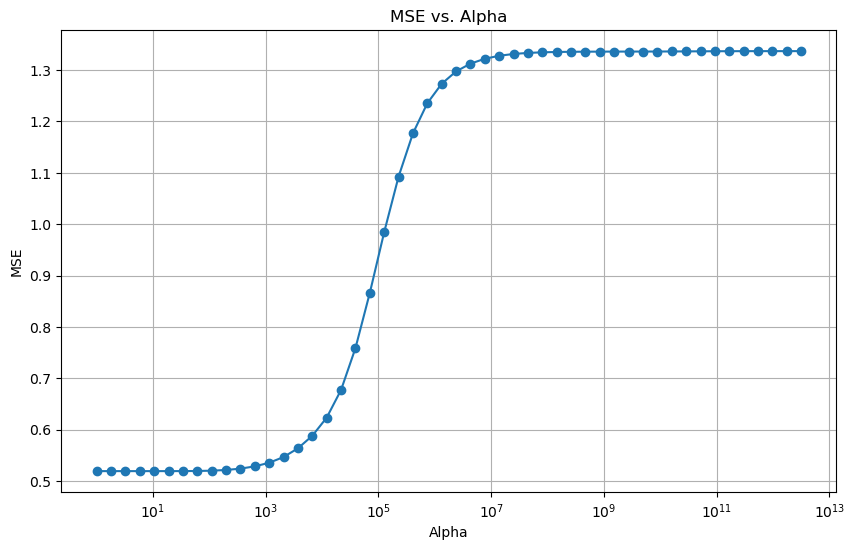

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import warnings

# Suprimir los FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Cargar el dataset de California Housing
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Separar las características (X) y el target (y)
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el rango de valores para alpha
alpha_range = np.logspace(0, 12.5, 50)

# Crear el modelo Ridge
ridge = Ridge()

# Configurar GridSearchCV para encontrar el mejor alpha, 5 folds
param_grid = {'alpha': alpha_range}
grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# Obtener el mejor valor de alpha
best_alpha = grid.best_params_['alpha']
print(f"Mejor valor de alpha: {best_alpha}")

# Calcular el MSE para cada valor de alpha
mse_values = -grid.cv_results_['mean_test_score']

# Graficar MSE vs. alpha
plt.figure(figsize=(10, 6))
plt.plot(alpha_range, mse_values, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.grid(True)
plt.show()


# 6. Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. ¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse reducido?

In [4]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings

# Suprimir los FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Cargar el dataset de California Housing
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Separar las características (X) y el target (y)
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_test_pred_lin = lin_reg.predict(X_test)

# Calcular las métricas para el modelo de regresión lineal
mse_lin = mean_squared_error(y_test, y_test_pred_lin)
mae_lin = mean_absolute_error(y_test, y_test_pred_lin)
r2_lin = r2_score(y_test, y_test_pred_lin)

# Buscar el mejor alpha para Ridge
alpha_range = np.linspace(0, 12.5, 50)
ridge = Ridge()
param_grid = {'alpha': alpha_range}
grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
best_alpha = grid.best_params_['alpha']

# Ajustar el modelo de regresión Ridge con el mejor alpha
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)
y_test_pred_ridge = ridge.predict(X_test)

# Calcular las métricas para el modelo de regresión Ridge
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
r2_ridge = r2_score(y_test, y_test_pred_ridge)

# Mostrar los resultados de la comparación
print("Regresión Lineal:")
print(f"MSE: {mse_lin}")
print(f"MAE: {mae_lin}")
print(f"R^2: {r2_lin}")

print("\nRegresión Ridge:")
print(f"MSE: {mse_ridge}")
print(f"MAE: {mae_ridge}")
print(f"R^2: {r2_ridge}")

# Comparar los resultados
result_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression'],
    'MSE': [mse_lin, mse_ridge],
    'MAE': [mae_lin, mae_ridge],
    'R^2': [r2_lin, r2_ridge]
})

print("\nComparación de Resultados:")
print(result_comparison)


Regresión Lineal:
MSE: 0.5558915986952441
MAE: 0.5332001304956573
R^2: 0.575787706032451

Regresión Ridge:
MSE: 0.5551496685049945
MAE: 0.5332374203444554
R^2: 0.5763538881958589

Comparación de Resultados:
               Model       MSE       MAE       R^2
0  Linear Regression  0.555892  0.533200  0.575788
1   Ridge Regression  0.555150  0.533237  0.576354
